In [178]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
may05_2018 = pd.read_csv('turnstile_180505.txt')
may12_2018 = pd.read_csv('turnstile_180512.txt')
may19_2018 = pd.read_csv('turnstile_180519.txt')
may26_2018 = pd.read_csv('turnstile_180526.txt')
jun02_2018 = pd.read_csv('turnstile_180602.txt')
jun09_2018 = pd.read_csv('turnstile_180609.txt')
jun16_2018 = pd.read_csv('turnstile_180616.txt')

source_data = [may05_2018, may12_2018, may19_2018, 
               may26_2018, jun02_2018, jun09_2018, 
               jun16_2018]

all_converted_data = []
for i in source_data:
    converted = i 
    converted['DATE'] = pd.to_datetime(i['DATE'] + ' ' + i['TIME'])
    converted.drop('TIME', axis=1, inplace=True)
    converted.rename(columns = lambda x: x.strip(), inplace=True)   
    all_converted_data.append(converted)
    
            
df = pd.concat(all_converted_data)
df.reset_index(drop=True, inplace=True)

In [30]:
with open('all_mta_data_clean_v2.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

In [32]:
# Function to find total differences in ENTRIES and EXITS columns
def mta_traffic(data, freq='D'):
    data.ENTRIES = data.ENTRIES - data.shift(1).ENTRIES
    data.EXITS = data.EXITS - data.shift(1).EXITS
    data = data.set_index(['SCP', 'STATION'])[['ENTRIES', 'EXITS', 'DATE']]
    data = data.resample(freq, on='DATE').sum()
    return data

In [118]:
del mta_traffic_v2

In [119]:
# Alternate function with more columns
def mta_traffic_v2(data, freq='D'):
    data.ENTRIES = data.ENTRIES - data.shift(1).ENTRIES
    data.EXITS = data.EXITS - data.shift(1).EXITS
    data = data.set_index(['STATION', 'SCP'])
    data = data.resample(freq, on='DATE').sum()
    return data

In [129]:
# Simplified function, eliminating resample
def mta_traffic_v3(data):
    data.ENTRIES = data.ENTRIES - data.shift(1).ENTRIES
    data.EXITS = data.EXITS - data.shift(1).EXITS
    return data

In [139]:
# Create small subset of data
df_subset = df.iloc[0:10000]

In [140]:
# df_subset.ENTRIES = df_subset.ENTRIES - df_subset.shift(1).ENTRIES
# df_subset.EXITS = df_subset.EXITS - df_subset.shift(1).EXITS

In [141]:
# Leong's algorithm
# last_index = df_subset.index[-1]
# ind = 0
# data = []
# while ind < last_index:
#     data.append(df_subset[ind:ind+6].groupby(['STATION', 'SCP']).apply(mta_traffic_v2))
#     ind += 6
# final_mta = pd.concat(data)
# del data

In [142]:
converted = mta_traffic_v3(df_subset)

In [143]:
converted

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28 00:00:00,REGULAR,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28 04:00:00,REGULAR,17.0,1.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28 08:00:00,REGULAR,16.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28 12:00:00,REGULAR,81.0,92.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28 16:00:00,REGULAR,214.0,60.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28 20:00:00,REGULAR,281.0,59.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29 00:00:00,REGULAR,128.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29 04:00:00,REGULAR,9.0,4.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29 08:00:00,REGULAR,10.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29 12:00:00,REGULAR,86.0,57.0


In [146]:
# Find excessively large values and negative values
df_copy = df.copy()
df_copy = mta_traffic_v3(df_copy)


In [148]:
print('Max ENTRIES:', df_copy.ENTRIES.max())
print('Max EXITS:', df_copy.EXITS.max())
print('Min ENTRIES:', df_copy.ENTRIES.min())
print('Min EXITS:', df_copy.EXITS.min())

Max ENTRIES: 2122212586.0
Max EXITS: 2062154027.0
Min ENTRIES: -2117487343.0
Min EXITS: -2040382412.0


In [155]:
print('Values over 1 billion:', len(df_copy.loc[(df_copy.ENTRIES > 1000000000) | (df_copy.EXITS > 1000000000)]))   
print('Values under -1 billion:', len(df_copy.loc[(df_copy.ENTRIES < -1000000000) | (df_copy.EXITS < -1000000000)]))   

Values over 1 billion: 567
Values under -1 billion: 566


In [156]:
print('Values over 1 million:', len(df_copy.loc[(df_copy.ENTRIES > 1000000) | (df_copy.EXITS > 1000000)]))   
print('Values under -1 million:', len(df_copy.loc[(df_copy.ENTRIES < -1000000) | (df_copy.EXITS < -1000000)]))   

Values over 1 million: 13538
Values under -1 million: 13368


In [158]:
# Return list of rows with values over 1 million
# df_copy.loc[(df_copy.ENTRIES > 1000000) | (df_copy.EXITS > 1000000)]

In [159]:
print('Values over 100k:', len(df_copy.loc[(df_copy.ENTRIES > 100000) | (df_copy.EXITS > 100000)]))   
print('Values under -100k:', len(df_copy.loc[(df_copy.ENTRIES < -100000) | (df_copy.EXITS < -100000)]))   

Values over 100k: 17808
Values under -100k: 18210


In [162]:
print('Values over 10k:', len(df_copy.loc[(df_copy.ENTRIES > 10000) | (df_copy.EXITS > 10000)]))   
print('Values under -10k:', len(df_copy.loc[(df_copy.ENTRIES < -10000) | (df_copy.EXITS < -10000)]))   

Values over 10k: 18997
Values under -10k: 19417


In [168]:
print('Values over 1K:', len(df_copy.loc[(df_copy.ENTRIES > 1000) | (df_copy.EXITS > 1000)]))   
print('Values under -1k:', len(df_copy.loc[(df_copy.ENTRIES < -1000) | (df_copy.EXITS < -1000)]))   

Values over 1K: 61287
Values under -1k: 21284


In [163]:
len(df_copy.loc[(df_copy.ENTRIES > 10000) | (df_copy.EXITS > 10000)]) / len(df_copy)

0.013774715924128485

In [196]:
len(df_copy.loc[(df_copy.ENTRIES > 10000) | (df_copy.EXITS > 10000)]) / len(df_copy)

0.013774715924128485

In [167]:
print('Median ENTRIES value:', df_copy.ENTRIES.median())
print('Median EXITS value:', df_copy.EXITS.median())

Median ENTRIES value: 75.0
Median EXITS value: 52.0


- The __above__ is interesting. It seems like the outliers are in the 1M+ range. Since this is only 1% of the values they're safe to change to 0. 
- Also the median values are way lower. After some exploration of what seem to be legitimate values, I'm setting a cutoff of 10000 and turning all values above that to 0. Not perfect, but still around only 1% of the data so it shouldn't affect the outcome dramatically and it should preserve the numbers of stations with greater traffic. 

In [194]:
df_copy.loc[(df_copy.ENTRIES.between(3000, 4500)) | (df_copy.EXITS.between(3000, 4500))]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,EXITS
47361,N051,R084,02-00-01,59 ST COLUMBUS,ABCD1,IND,2018-05-02 20:00:00,REGULAR,3506.0,47.0
47367,N051,R084,02-00-01,59 ST COLUMBUS,ABCD1,IND,2018-05-03 20:00:00,REGULAR,3497.0,22.0
47409,N051,R084,02-00-02,59 ST COLUMBUS,ABCD1,IND,2018-05-03 20:00:00,REGULAR,3002.0,115.0
50113,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-05-01 20:00:00,REGULAR,79.0,4025.0
50119,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-05-02 20:00:00,REGULAR,82.0,4185.0
50125,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-05-03 20:00:00,REGULAR,107.0,4429.0
50131,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-05-04 20:00:00,REGULAR,127.0,3867.0
50149,N063A,R011,00-00-01,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-04-30 20:00:00,REGULAR,132.0,4111.0
50155,N063A,R011,00-00-01,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-05-01 20:00:00,REGULAR,133.0,3526.0
50161,N063A,R011,00-00-01,42 ST-PORT AUTH,ACENQRS1237W,IND,2018-05-02 20:00:00,REGULAR,172.0,3366.0


In [197]:
# Change outlier positive values to 0
df_copy.loc[(df_copy.ENTRIES > 10000) | (df_copy.EXITS > 100000), ['ENTRIES', 'EXITS']] = 0

In [199]:
# Change negative values to zero
df_copy.loc[(df_copy.ENTRIES < 0) | (df_copy.EXITS < 0), ['ENTRIES', 'EXITS']] = 0

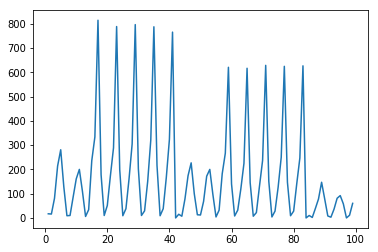

In [204]:
plt.plot(df_copy.iloc[0:100].ENTRIES)


In [206]:
# Create STATION + LINENAME column
df_copy['NEW_STATION'] = df_copy['STATION'] + "-" + df_copy['LINENAME']

In [208]:
# Create TOTALS column
df_copy['TOTALS'] = df_copy['ENTRIES'] + df_copy['EXITS']

In [212]:
# Totals for top 10 stations
top10_stations = df_copy.groupby('NEW_STATION')['TOTALS'].sum().nlargest(10)
top10_stations

NEW_STATION
GRD CNTRL-42 ST-4567S           11448927.0
34 ST-HERALD SQ-BDFMNQRW         8970324.0
34 ST-PENN STA-ACE               6451626.0
14 ST-UNION SQ-LNQR456W          5995369.0
42 ST-PORT AUTH-ACENQRS1237W     5810794.0
TIMES SQ-42 ST-1237ACENQRSW      5334770.0
FULTON ST-2345ACJZ               4934534.0
59 ST COLUMBUS-ABCD1             4578250.0
FLUSHING-MAIN-7                  4496626.0
47-50 STS ROCK-BDFM              4420506.0
Name: TOTALS, dtype: float64

In [233]:
# Totals for all stations
station_totals = df_copy.groupby('NEW_STATION')['TOTALS'].sum()
station_totals

NEW_STATION
1 AV-L                         2079602.0
103 ST-1                        850318.0
103 ST-6                       1093566.0
103 ST-BC                       437389.0
103 ST-CORONA-7                1501457.0
104 ST-A                         90091.0
104 ST-JZ                        95682.0
110 ST-6                        892554.0
111 ST-7                        746157.0
111 ST-A                        144679.0
111 ST-J                        186120.0
116 ST-23                       725677.0
116 ST-6                       1067563.0
116 ST-BC                       449479.0
116 ST-COLUMBIA-1               825262.0
121 ST-JZ                        75789.0
125 ST-1                        683399.0
125 ST-23                       819514.0
125 ST-456                     2151927.0
125 ST-ACBD                    2312742.0
135 ST-23                       802169.0
135 ST-BC                       393357.0
137 ST CITY COL-1              1203315.0
138/GRAND CONC-45               247098.0
14 S

In [221]:
daily_totals = df_copy.groupby('NEW_STATION').resample('D', on='DATE').sum()

In [222]:
# The below is interesting. Resample can only operate 
daily_totals

ENTRIES    EXITS   TOTALS
NEW_STATION DATE                                 
1 AV-L      2018-04-28  15791.0  18077.0  33868.0
            2018-04-29  16931.0  19414.0  36345.0
            2018-04-30  21267.0  24012.0  45279.0
            2018-05-01  21741.0  23274.0  45015.0
            2018-05-02  22845.0  24790.0  47635.0
            2018-05-03  23446.0  24992.0  48438.0
            2018-05-04  23623.0  25625.0  49248.0
            2018-05-05  15478.0  17920.0  33398.0
            2018-05-06  16569.0  18101.0  34670.0
            2018-05-07  20593.0  22351.0  42944.0
            2018-05-08  22018.0  23918.0  45936.0
            2018-05-09  22790.0  24544.0  47334.0
            2018-05-10  22774.0  25420.0  48194.0
            2018-05-11  23436.0  25707.0  49143.0
            2018-05-12  14273.0  16699.0  30972.0
            2018-05-13  14273.0  16158.0  30431.0
            2018-05-14  20305.0  23173.0  43478.0
            2018-05-15  22731.0  26312.0  49043.0
            2018-05-16  23475.0  26340.0  49815.0
            2018-05-17  22982.0  25325.0  48307.0
            2018-05-18  24305.0  26362.0  50667.0
            2018-05-19  15045.0  17461.0  32506.0
            2018-05-20  16562.0  18345.0  34907.0
            2018-05-21  21072.0  23410.0  44482.0
            2018-05-22  22559.0  25002.0  47561.0
            2018-05-23  22972.0  24877.0  47849.0
            2018-05-24  23403.0  25265.0  48668.0
            2018-05-25  23579.0  25023.0  48602.0
            2018-05-26  12813.0  14984.0  27797.0
            2018-05-27  13287.0  15456.0  28743.0
...                         ...      ...      ...
ZEREGA AV-6 2018-05-17   2818.0   2463.0   5281.0
            2018-05-18   2741.0   2498.0   5239.0
            2018-05-19   1171.0   1069.0   2240.0
            2018-05-20   1036.0   1082.0   2118.0
            2018-05-21   2787.0   2384.0   5171.0
            2018-05-22   2776.0   2652.0   5428.0
            2018-05-23   2863.0   2365.0   5228.0
            2018-05-24   2852.0   2614.0   5466.0
            2018-05-25   2661.0   2380.0   5041.0
            2018-05-26   1210.0   1089.0   2299.0
            2018-05-27   1011.0    996.0   2007.0
            2018-05-28   1058.0   1084.0   2142.0
            2018-05-29   2573.0   2364.0   4937.0
            2018-05-30   2559.0   2566.0   5125.0
            2018-05-31   2539.0   2540.0   5079.0
            2018-06-01   2634.0   2456.0   5090.0
            2018-06-02   1251.0   1039.0   2290.0
            2018-06-03   1033.0   1084.0   2117.0
            2018-06-04   2737.0   2424.0   5161.0
            2018-06-05   2789.0   2599.0   5388.0
            2018-06-06   2885.0   2652.0   5537.0
            2018-06-07   2671.0   2401.0   5072.0
            2018-06-08   2748.0   2478.0   5226.0
            2018-06-09   1430.0   1228.0   2658.0
            2018-06-10   1147.0   1176.0   2323.0
            2018-06-11   2621.0   2316.0   4937.0
            2018-06-12   2755.0   2464.0   5219.0
            2018-06-13   2721.0   2411.0   5132.0
            2018-06-14   2767.0   2432.0   5199.0
            2018-06-15   2335.0   2169.0   4504.0

[23155 rows x 3 columns]

In [225]:
daily_totals_reset = daily_totals.reset_index()
daily_totals_reset

,NEW_STATION,DATE,ENTRIES,EXITS,TOTALS
0,1 AV-L,2018-04-28,15791.0,18077.0,33868.0
1,1 AV-L,2018-04-29,16931.0,19414.0,36345.0
2,1 AV-L,2018-04-30,21267.0,24012.0,45279.0
3,1 AV-L,2018-05-01,21741.0,23274.0,45015.0
4,1 AV-L,2018-05-02,22845.0,24790.0,47635.0
5,1 AV-L,2018-05-03,23446.0,24992.0,48438.0
6,1 AV-L,2018-05-04,23623.0,25625.0,49248.0
7,1 AV-L,2018-05-05,15478.0,17920.0,33398.0
8,1 AV-L,2018-05-06,16569.0,18101.0,34670.0
9,1 AV-L,2018-05-07,20593.0,22351.0,42944.0


In [226]:
!ls

Project 1_demographics.ipynb project_1_benson.ipynb
Project_Benson_Deck.pptx     project_benson_notes.md
README.md                    test_df.pickle
Remote-Booth-Station.xls     turnstile_180505.txt
all_mta_data_clean.pickle    turnstile_180512.txt
all_mta_data_clean_v2.pickle turnstile_180519.txt
final_testdf.pickle          turnstile_180526.txt
final_testdf_totals.pickle   turnstile_180602.txt
nyc_demo_simplified.csv      turnstile_180609.txt
nynta (1).csv                turnstile_180616.txt
pickle_test.ipynb            ~$Project_Benson_Deck.pptx


In [228]:
!ls

Project 1_demographics.ipynb project_1_benson.ipynb
Project_Benson_Deck.pptx     project_benson_notes.md
README.md                    test_df.pickle
Remote-Booth-Station.xls     turnstile_180505.txt
all_mta_data_clean.pickle    turnstile_180512.txt
all_mta_data_clean_v2.pickle turnstile_180519.txt
daily_totals.pickle          turnstile_180526.txt
final_testdf.pickle          turnstile_180602.txt
final_testdf_totals.pickle   turnstile_180609.txt
nyc_demo_simplified.csv      turnstile_180616.txt
nynta (1).csv                ~$Project_Benson_Deck.pptx
pickle_test.ipynb


In [230]:
!ls

Project 1_demographics.ipynb project_1_benson.ipynb
Project_Benson_Deck.pptx     project_benson_notes.md
README.md                    test_df.pickle
Remote-Booth-Station.xls     turnstile_180505.txt
all_mta_data_clean.pickle    turnstile_180512.txt
all_mta_data_clean_v2.pickle turnstile_180519.txt
final_testdf.pickle          turnstile_180526.txt
final_testdf_totals.pickle   turnstile_180602.txt
nyc_demo_simplified.csv      turnstile_180609.txt
nynta (1).csv                turnstile_180616.txt
pickle_test.ipynb            ~$Project_Benson_Deck.pptx


In [231]:
with open('daily_totals_reset.pickle', 'wb') as to_write:
    pickle.dump(daily_totals_reset, to_write)

In [232]:
!ls

Project 1_demographics.ipynb project_1_benson.ipynb
Project_Benson_Deck.pptx     project_benson_notes.md
README.md                    test_df.pickle
Remote-Booth-Station.xls     turnstile_180505.txt
all_mta_data_clean.pickle    turnstile_180512.txt
all_mta_data_clean_v2.pickle turnstile_180519.txt
daily_totals_reset.pickle    turnstile_180526.txt
final_testdf.pickle          turnstile_180602.txt
final_testdf_totals.pickle   turnstile_180609.txt
nyc_demo_simplified.csv      turnstile_180616.txt
nynta (1).csv                ~$Project_Benson_Deck.pptx
pickle_test.ipynb


In [234]:
with open('station_totals.pickle', 'wb') as to_write:
    pickle.dump(station_totals, to_write)

In [235]:
!ls

Project 1_demographics.ipynb project_1_benson.ipynb
Project_Benson_Deck.pptx     project_benson_notes.md
README.md                    station_totals.pickle
Remote-Booth-Station.xls     test_df.pickle
all_mta_data_clean.pickle    turnstile_180505.txt
all_mta_data_clean_v2.pickle turnstile_180512.txt
daily_totals_reset.pickle    turnstile_180519.txt
final_testdf.pickle          turnstile_180526.txt
final_testdf_totals.pickle   turnstile_180602.txt
nyc_demo_simplified.csv      turnstile_180609.txt
nynta (1).csv                turnstile_180616.txt
pickle_test.ipynb            ~$Project_Benson_Deck.pptx
